# 英國脫歐文字探勘

TF-IDF練習:使用2019英國脫歐相關新聞

### TF-IDF練習:使用華航載運iphone 8 新機的相關新聞

In [5]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

### 從指定路徑中讀入新聞資料

In [2]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 10


### 製作詞頻矩陣
下面以 Python 實現製作詞頻矩陣的步驟，並附上對應的`fintextmin`函式

In [6]:
## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
# stopwords = [] 
# dwc = count_words_in_documents(doc_list = text_list,
#                               doc_names = range(len(text_list)),
#                                stopwords = stopwords)

In [7]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('\ufeff', 1),
 ('若', 3),
 ('英國脫', 2),
 ('歐協議', 4),
 ('不', 3),
 ('獲國會', 2),
 ('通過', 3),
 (' ', 17),
 ('傳梅克爾會', 2),
 ('說服', 3)]

In [8]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,研判,如果,上證,86.11,報,一則,短缺,不想,措施,歐盟將,...,三是,還將,0.52%,今表決,萬個,商,全世界,愛,承諾,0.44%
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 製作TF-IDF矩陣
可以將完成後的tf-idf矩陣與上面的詞頻矩陣比較一下係數

In [9]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm) 

,研判,如果,上證,86.11,報,一則,短缺,不想,措施,歐盟將,...,三是,還將,0.52%,今表決,萬個,商,全世界,愛,承諾,0.44%
0,0.000000,0.083901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.040956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.064855,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.052261,0.066005,0.000000,0.000000,0.061477,0.061477,0.000000,0.000000,0.000000,0.000000,...,0.061477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.096394,0.056696,0.00000,0.000000,0.000000
5,0.037791,0.000000,0.044455,0.044455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.044455,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.044455
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040589,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.040589,0.034504,0.000000,0.00000,0.000000,0.000000
7,0.000000,0.040831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.025353,0.000000,0.000000,0.000000,0.000000,0.000000,0.07606,0.000000,0.000000
8,0.000000,0.024203,0.000000,0.000000,0.000000,0.000000,0.000000,0.045085,0.134124,0.045085,...,0.000000,0.000000,0.000000,0.045085,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,0.000000,0.017228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047735,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.027281,0.000000


### 視覺化TFIDF和原本詞頻矩陣的差異

這邊我們取第一篇文章來比較看看調整前後的詞彙係數

In [10]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('研判', 0.0),
 ('如果', 2.0),
 ('上證', 0.0),
 ('86.11', 0.0),
 ('報', 0.0),
 ('一則', 0.0),
 ('短缺', 0.0),
 ('不想', 0.0),
 ('措施', 0.0),
 ('歐盟將', 0.0)]

### 文字雲

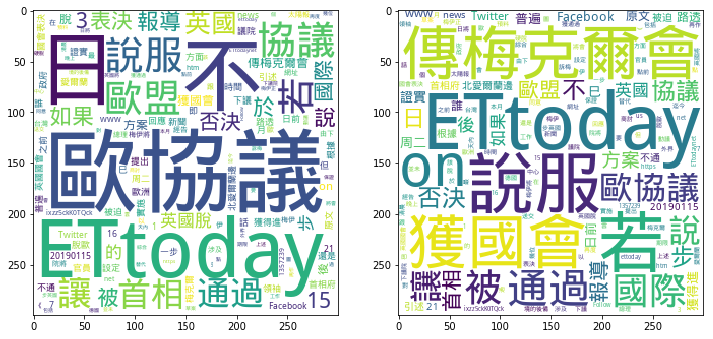

In [14]:
linux_font = r'/Users/leeyishan/Documents/GitHub/g10716005/week_05/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300) 

### 長條圖
可以發現，經過TF-IDF處理之後，比較重要的資訊如「股價」、「747」(註：此指波音747)等詞彙被突顯出來。

每篇文章都會出現的「華航」和所有格用字「的」排序則向下調整。

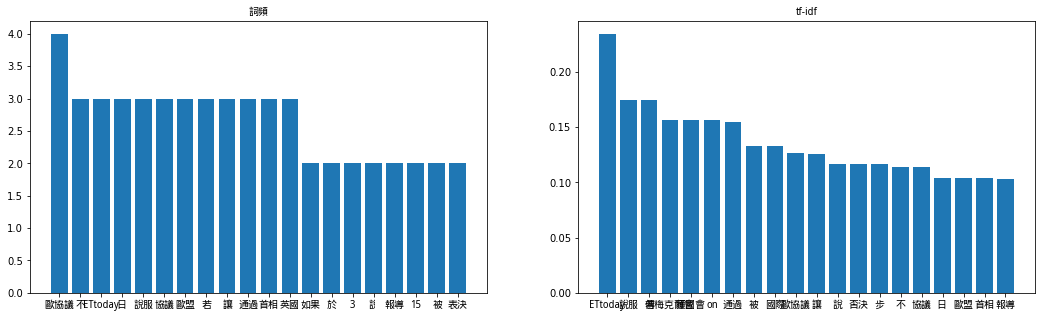

In [15]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf") 